In [1]:
!pip install pandas
import pandas as pd
!pip install seaborn
import seaborn as sns
!pip install matplotlib
import matplotlib.pyplot as plt

In [2]:
gas_price = pd.read_csv(r'C:\Users\user\Downloads\GASREGW.csv')

In [3]:
gas_price.head(10)
#*GASREGW: Gas Regular Weekly

,DATE,GASREGW
0,1990-08-20,1.191
1,1990-08-27,1.245
2,1990-09-03,1.242
3,1990-09-10,1.252
4,1990-09-17,1.266
5,1990-09-24,1.272
6,1990-10-01,1.321
7,1990-10-08,1.333
8,1990-10-15,1.339
9,1990-10-22,1.345


In [4]:
gas_price.rename(columns={'GASREGW': 'PRICE'}, inplace= True)

In [5]:
gas_price.describe()

,DATE,PRICE
count,1729,1729
unique,1729,1223
top,1990-08-20,.
freq,1,6


In [6]:
gas_price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1729 entries, 0 to 1728
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   DATE    1729 non-null   object
 1   PRICE   1729 non-null   object
dtypes: object(2)
memory usage: 27.1+ KB


In [7]:
gas_price.sort_values('PRICE', ascending= True)

,DATE,PRICE
20,1991-01-07,.
18,1990-12-24,.
17,1990-12-17,.
16,1990-12-10,.
21,1991-01-14,.
...,...,...
1663,2022-07-04,4.771
1662,2022-06-27,4.872
1659,2022-06-06,4.876
1661,2022-06-20,4.962


In [8]:
gas_price['PRICE'] = pd.to_numeric(gas_price['PRICE'], errors='coerce').dropna() 
gas_price['DATE'] = pd.to_datetime(gas_price['DATE'])
gas_price_monthly = gas_price.resample('M', on = 'DATE')['PRICE'].mean()

In [9]:
gas_price_monthly = pd.DataFrame(gas_price_monthly)
gas_price_monthly.reset_index(inplace=True)
gas_price_monthly['DATE'] = gas_price_monthly['DATE'].dt.strftime('%Y-%m')
gas_price_monthly.sort_values('PRICE', ascending= True)

,DATE,PRICE
102,1999-02,0.92050
101,1999-01,0.93900
100,1998-12,0.94500
103,1999-03,0.98200
99,1998-11,0.99540
...,...,...
380,2022-04,4.10850
379,2022-03,4.22175
381,2022-05,4.44360
383,2022-07,4.55925


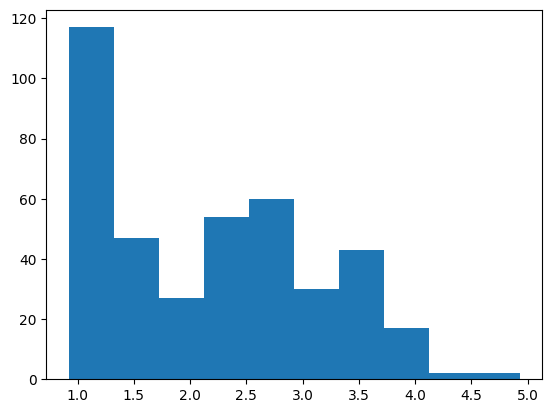

In [10]:
#Plotting values to overview outliers and strange values
plt.hist(gas_price_monthly['PRICE'])
plt.show()

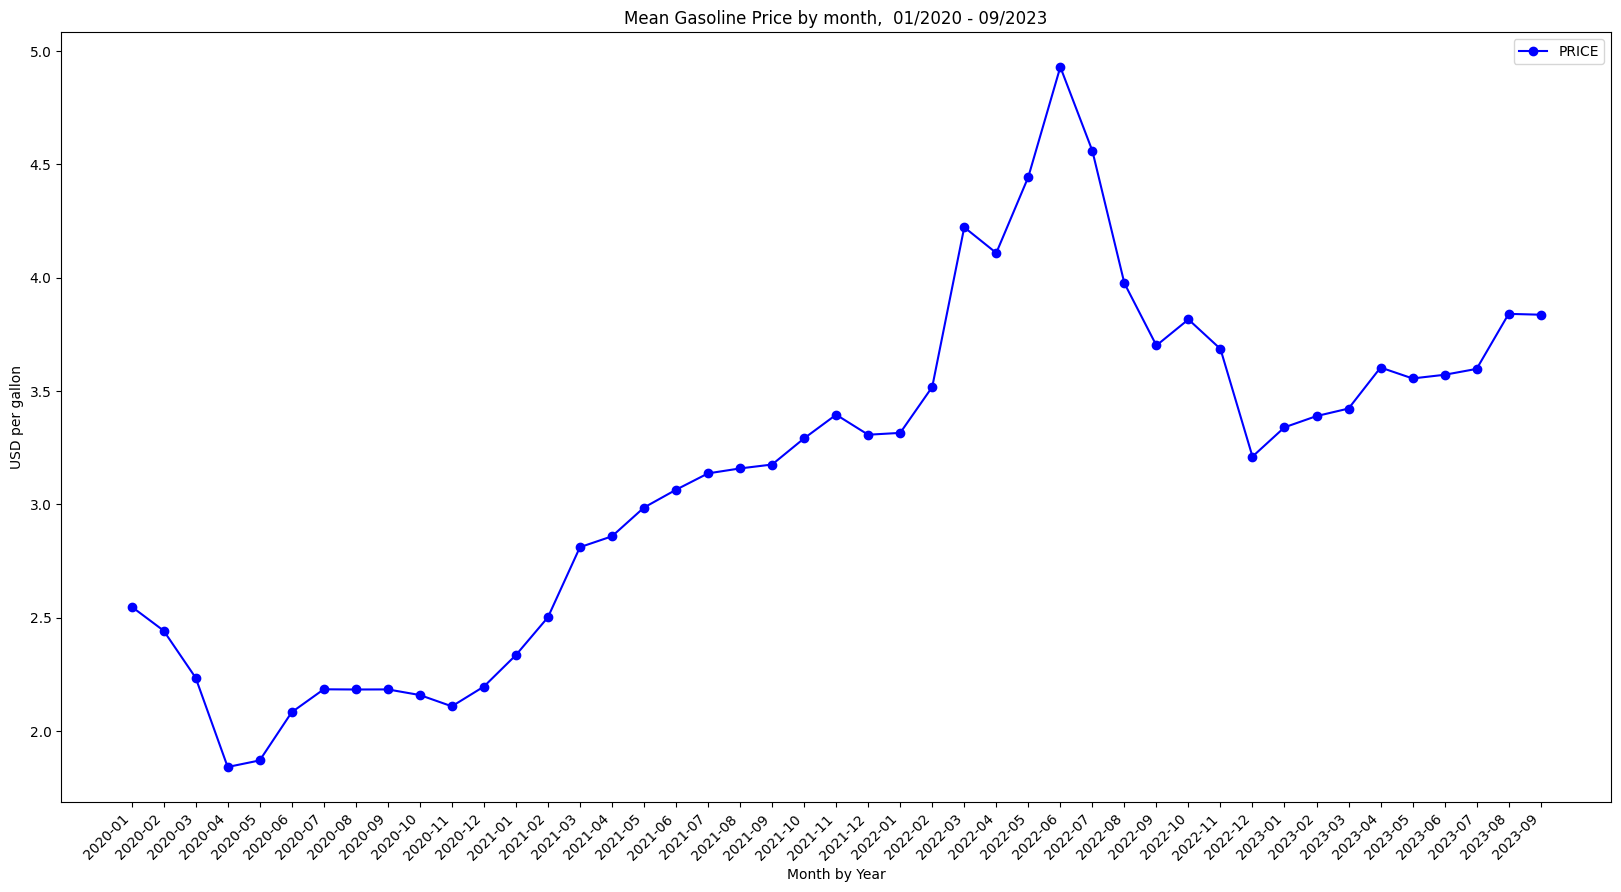

In [13]:
#Selecting and plotting data matching COVID-19 dates
gas_price_monthly = gas_price_monthly[(gas_price_monthly['DATE'] >= '2020-01') & (gas_price_monthly['DATE'] < '2023-10')]
ax = gas_price_monthly.plot(x='DATE', y='PRICE', marker='o', xlabel='Month by Year', ylabel='USD per gallon', color='blue', 
                               title='Mean Gasoline Price by month,  01/2020 - 09/2023')
plt.gcf().set_size_inches(20, 10)
ax.set_xticks(range(len(gas_price_monthly['DATE'])))
ax.set_xticklabels(gas_price_monthly['DATE'], rotation=45, ha='right')
plt.savefig('Mean Gasoline Price by month.png')
plt.show()